## Data Columns Descriptions
* user_id - The unique id assigned to the user.
* installation_at - The UTC time that the user installed the app.
* request_created_at - The time at which the user first submitted a quote request. If null, a customer never submitted a quote request.
* agent_responded_to_customer_at - The time which our sales agent picked up the account and began interacting with the customer. If null, the agent never responded to the customer (this is generally because they’ve indicated they’re not interested in the insurance policy).
* customer_sold_at - The time which sales sold the account an insurance policy. If null, the customer was not sold.

## Problem

>We’re trying to decide when we should / should not spend on paid marketing to acquire customers. For example, should we be spending the wee hours of the morning, or on weekends? For this, please use the dataset to determine how conversion is subject to the day of week and time of day that a customer installed the app. You can assume that the cost to install on particular times of day and days per week is constant. Please make a recommendation for if we should only spend on particular days/time, or if not, why not?

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cover_test_dataset.csv", 
                 parse_dates=True)
df.head()

,user_id,installation_at,request_created_at,agent_responded_to_customer_at,customer_sold_at
0,197393,2019-10-09 23:58,2019-10-10 0:03,2019-10-10 18:16,NaN
1,197392,2019-10-09 23:57,2019-10-10 0:04,NaN,NaN
2,197391,2019-10-09 23:56,NaN,NaN,NaN
3,197390,2019-10-09 23:56,2019-10-10 0:11,2019-10-10 0:26,NaN
4,197389,2019-10-09 23:56,2019-10-09 23:59,2019-10-10 23:09,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132296 entries, 0 to 132295
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   user_id                         132296 non-null  int64 
 1   installation_at                 132290 non-null  object
 2   request_created_at              99058 non-null   object
 3   agent_responded_to_customer_at  74394 non-null   object
 4   customer_sold_at                5741 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.0+ MB


In [4]:

# # Add datetime parameters for saledate
# df["installYear"] = df.installation_at.dt.year
# df["installMonth"] = df.installation_at.dt.month
# df["installDay"] = df.installation_at.dt.day
# df["installDayofweek"] = df.installation_at.dt.dayofweek
# df["installDayofyear"] = df.installation_at.dt.dayofyear
# df["installTime"] = df.installation_at.dt.time


# df["requestYear"] = df.request_created_at.dt.year
# df["requestMonth"] = df.request_created_at.dt.month
# df["requestDay"] = df.request_created_at.dt.day
# df["requestDayofweek"] = df.request_created_at.dt.dayofweek
# df["requestDayofyear"] = df.request_created_at.dt.dayofyear
# df["requestDayofyear"] = df.request_created_at.dt.dayofyear
# df["requestTime"] = df.request_created_at.dt.time

# df["agentresponseYear"] = df.agent_responded_to_customer_at.dt.year
# df["agentresponseMonth"] = df.agent_responded_to_customer_at.dt.month
# df["agentresponseDay"] = df.agent_responded_to_customer_at.dt.day
# df["agentresponseDayofweek"] = df.agent_responded_to_customer_at.dt.dayofweek
# df["agentresponseDayofyear"] = df.agent_responded_to_customer_at.dt.dayofyear
# df["agentresponseTime"] = df.agent_responded_to_customer_at.dt.time

# df["customersoldYear"] = df.customer_sold_at.dt.year
# df["customersoldMonth"] = df.customer_sold_at.dt.month
# df["customersoldDay"] = df.customer_sold_at.dt.day
# df["customersoldDayofweek"] = df.customer_sold_at.dt.dayofweek
# df["customersoldDayofyear"] = df.customer_sold_at.dt.dayofyear
# df["customersoldTime"] = df.customer_sold_at.dt.time

In [5]:
df['installation_time'] = pd.to_datetime(df['installation_at']).dt.time
df['installation_at'] = pd.to_datetime(df['installation_at'])


df['request_time'] = pd.to_datetime(df['request_created_at']).dt.time
df['request_created_at'] = pd.to_datetime(df['request_created_at'])

df['agent_respond_time'] = pd.to_datetime(df['agent_responded_to_customer_at']).dt.time
df['agent_responded_to_customer_at'] = pd.to_datetime(df['agent_responded_to_customer_at'])

df['customer_sold_time'] = pd.to_datetime(df['customer_sold_at']).dt.time
df['customer_sold_at'] = pd.to_datetime(df['customer_sold_at'])

In [6]:
df.head()

,user_id,installation_at,request_created_at,agent_responded_to_customer_at,customer_sold_at,installation_time,request_time,agent_respond_time,customer_sold_time
0,197393,2019-10-09 23:58:00,2019-10-10 00:03:00,2019-10-10 18:16:00,NaT,23:58:00,00:03:00,18:16:00,NaT
1,197392,2019-10-09 23:57:00,2019-10-10 00:04:00,NaT,NaT,23:57:00,00:04:00,NaT,NaT
2,197391,2019-10-09 23:56:00,NaT,NaT,NaT,23:56:00,NaT,NaT,NaT
3,197390,2019-10-09 23:56:00,2019-10-10 00:11:00,2019-10-10 00:26:00,NaT,23:56:00,00:11:00,00:26:00,NaT
4,197389,2019-10-09 23:56:00,2019-10-09 23:59:00,2019-10-10 23:09:00,NaT,23:56:00,23:59:00,23:09:00,NaT


In [7]:
#If missing value is NaN
df['Sold'] = np.where(df['customer_sold_at'].isna(), 0 , 1)

In [8]:
# df.drop(["installation_at", 
#           "request_created_at", 
#           "agent_responded_to_customer_at",
#           "customer_sold_at"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132296 entries, 0 to 132295
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   user_id                         132296 non-null  int64         
 1   installation_at                 132290 non-null  datetime64[ns]
 2   request_created_at              99058 non-null   datetime64[ns]
 3   agent_responded_to_customer_at  74394 non-null   datetime64[ns]
 4   customer_sold_at                5741 non-null    datetime64[ns]
 5   installation_time               132290 non-null  object        
 6   request_time                    99058 non-null   object        
 7   agent_respond_time              74394 non-null   object        
 8   customer_sold_time              5741 non-null    object        
 9   Sold                            132296 non-null  int64         
dtypes: datetime64[ns](4), int64(2), object(4)
memory usage: 

In [10]:
df['installation_day_of_week'] = df['installation_at'].dt.day_name()
df['request_day_of_week'] = df['request_created_at'].dt.day_name()
df['agent_respond_day_of_week'] = df['agent_responded_to_customer_at'].dt.day_name()
df['customer_sold_day_of_week'] = df['customer_sold_at'].dt.day_name()

In [11]:
df.head()

,user_id,installation_at,request_created_at,agent_responded_to_customer_at,customer_sold_at,installation_time,request_time,agent_respond_time,customer_sold_time,Sold,installation_day_of_week,request_day_of_week,agent_respond_day_of_week,customer_sold_day_of_week
0,197393,2019-10-09 23:58:00,2019-10-10 00:03:00,2019-10-10 18:16:00,NaT,23:58:00,00:03:00,18:16:00,NaT,0,Wednesday,Thursday,Thursday,NaN
1,197392,2019-10-09 23:57:00,2019-10-10 00:04:00,NaT,NaT,23:57:00,00:04:00,NaT,NaT,0,Wednesday,Thursday,NaN,NaN
2,197391,2019-10-09 23:56:00,NaT,NaT,NaT,23:56:00,NaT,NaT,NaT,0,Wednesday,NaN,NaN,NaN
3,197390,2019-10-09 23:56:00,2019-10-10 00:11:00,2019-10-10 00:26:00,NaT,23:56:00,00:11:00,00:26:00,NaT,0,Wednesday,Thursday,Thursday,NaN
4,197389,2019-10-09 23:56:00,2019-10-09 23:59:00,2019-10-10 23:09:00,NaT,23:56:00,23:59:00,23:09:00,NaT,0,Wednesday,Wednesday,Thursday,NaN


# Preprocessing pipeline

In [12]:
#df.fillna(0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132296 entries, 0 to 132295
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   user_id                         132296 non-null  int64         
 1   installation_at                 132290 non-null  datetime64[ns]
 2   request_created_at              99058 non-null   datetime64[ns]
 3   agent_responded_to_customer_at  74394 non-null   datetime64[ns]
 4   customer_sold_at                5741 non-null    datetime64[ns]
 5   installation_time               132290 non-null  object        
 6   request_time                    99058 non-null   object        
 7   agent_respond_time              74394 non-null   object        
 8   customer_sold_time              5741 non-null    object        
 9   Sold                            132296 non-null  int64         
 10  installation_day_of_week        132290 non-null  object 

In [14]:
df.isna().sum()

user_id                                0
installation_at                        6
request_created_at                 33238
agent_responded_to_customer_at     57902
customer_sold_at                  126555
installation_time                      6
request_time                       33238
agent_respond_time                 57902
customer_sold_time                126555
Sold                                   0
installation_day_of_week               6
request_day_of_week                33238
agent_respond_day_of_week          57902
customer_sold_day_of_week         126555
dtype: int64

In [15]:
# copy dataframe

df_processed = df.copy()

In [16]:
# These columns contain strings
for label, content in df_processed.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

installation_time
request_time
agent_respond_time
customer_sold_time
installation_day_of_week
request_day_of_week
agent_respond_day_of_week
customer_sold_day_of_week


In [17]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [18]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132296 entries, 0 to 132295
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   user_id                         132296 non-null  int64         
 1   installation_at                 132290 non-null  datetime64[ns]
 2   request_created_at              99058 non-null   datetime64[ns]
 3   agent_responded_to_customer_at  74394 non-null   datetime64[ns]
 4   customer_sold_at                5741 non-null    datetime64[ns]
 5   installation_time               132290 non-null  object        
 6   request_time                    99058 non-null   object        
 7   agent_respond_time              74394 non-null   object        
 8   customer_sold_time              5741 non-null    object        
 9   Sold                            132296 non-null  int64         
 10  installation_day_of_week        132290 non-null  object 

In [19]:
# Check columns which *aren't* numeric
for label, content in df_processed.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

installation_at
request_created_at
agent_responded_to_customer_at
customer_sold_at
installation_time
request_time
agent_respond_time
customer_sold_time
installation_day_of_week
request_day_of_week
agent_respond_day_of_week
customer_sold_day_of_week


In [20]:
# Turn categorical variables into numbers
for label, content in df_processed.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_processed[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_processed[label] = pd.Categorical(content).codes+1

In [21]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132296 entries, 0 to 132295
Data columns (total 26 columns):
 #   Column                                     Non-Null Count   Dtype
---  ------                                     --------------   -----
 0   user_id                                    132296 non-null  int64
 1   installation_at                            132296 non-null  int32
 2   request_created_at                         132296 non-null  int32
 3   agent_responded_to_customer_at             132296 non-null  int32
 4   customer_sold_at                           132296 non-null  int16
 5   installation_time                          132296 non-null  int16
 6   request_time                               132296 non-null  int16
 7   agent_respond_time                         132296 non-null  int16
 8   customer_sold_time                         132296 non-null  int16
 9   Sold                                       132296 non-null  int64
 10  installation_day_of_week        

In [22]:
df_processed.isna().sum()

user_id                                      0
installation_at                              0
request_created_at                           0
agent_responded_to_customer_at               0
customer_sold_at                             0
installation_time                            0
request_time                                 0
agent_respond_time                           0
customer_sold_time                           0
Sold                                         0
installation_day_of_week                     0
request_day_of_week                          0
agent_respond_day_of_week                    0
customer_sold_day_of_week                    0
installation_at_is_missing                   0
request_created_at_is_missing                0
agent_responded_to_customer_at_is_missing    0
customer_sold_at_is_missing                  0
installation_time_is_missing                 0
request_time_is_missing                      0
agent_respond_time_is_missing                0
customer_sold

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

In [24]:
from sklearn.model_selection import train_test_split

X = df_processed.drop("Sold", axis = 1)
y = df_processed["Sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rfc_model.score(X_train, y_train)

1.0

In [27]:
rfc_model.score(X_test, y_test)

1.0

In [28]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

In [29]:
show_scores(rfc_model)

{'Training MAE': 0.0,
 'Test MAE': 0.0,
 'Training RMSLE': 0.0,
 'Test RMSLE': 0.0,
 'Training R^2': 1.0,
 'Test R^2': 1.0}

In [30]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


CPU times: user 1min 15s, sys: 4.5 s, total: 1min 20s
Wall time: 1min 22s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [31]:
show_scores(rs_model)

{'Training MAE': 0.0,
 'Test MAE': 0.0,
 'Training RMSLE': 0.0,
 'Test RMSLE': 0.0,
 'Training R^2': 1.0,
 'Test R^2': 1.0}

In [32]:
test_preds = rs_model.predict(X_test)

In [33]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["user_id"] = X_test["user_id"]
df_preds["y_test"] = y_test
df_preds["Prediction"] = test_preds
df_preds.to_csv("Prediction_Set.csv")

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_preds)
print(cm)

[[25350     0]
 [    0  1110]]


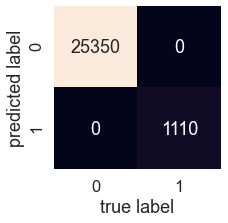

In [35]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, test_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                    fmt='d')
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, test_preds)

In [36]:
# Find feature importance of our best model
rfc_model.feature_importances_

array([5.79081406e-05, 0.00000000e+00, 2.65083792e-04, 2.39262497e-03,
       9.31275320e-02, 2.24851161e-06, 3.31638385e-04, 1.75276361e-03,
       1.09272246e-01, 0.00000000e+00, 3.97652813e-09, 3.39499159e-04,
       1.82708534e-01, 0.00000000e+00, 1.27055000e-07, 3.41267031e-04,
       2.28191772e-01, 0.00000000e+00, 0.00000000e+00, 8.84529345e-04,
       1.82369681e-01, 0.00000000e+00, 1.53449026e-04, 2.23784543e-03,
       1.95571247e-01])

In [37]:

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

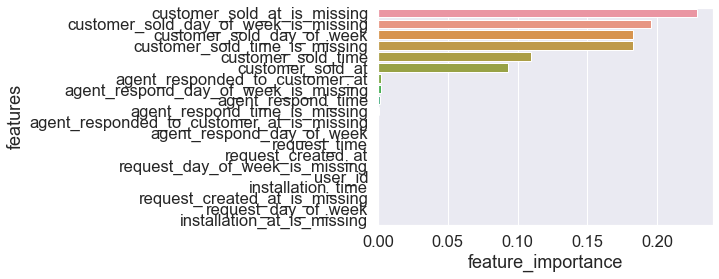

In [38]:
plot_features(X_train.columns, rfc_model.feature_importances_)

The importance columns for prediciting if a customer bought the insurance policy is:
    - The time the customer was sold the policy and the day of the week they were sold the policy

### Let's graph the day of the week

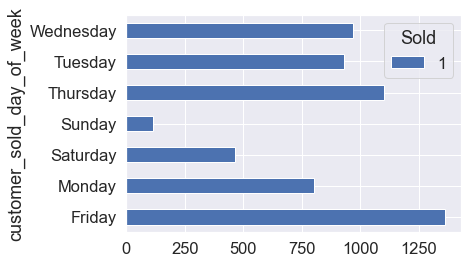

In [39]:
df.groupby(['Sold']).customer_sold_day_of_week.value_counts().unstack(0).plot.barh();

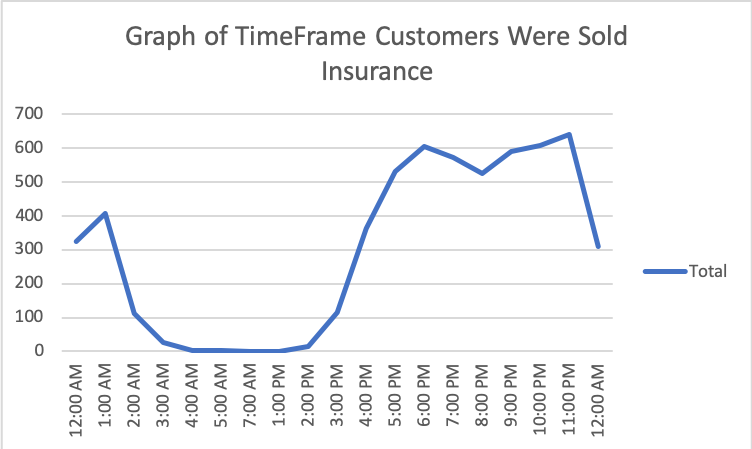

In [40]:
from IPython.display import Image
#The graph below was made in excel
Image(filename="Picture1.png")

Results:

 - You're more likely to sell policy on any day druing the week except on Mondays.
 - Also, you are more likely to get a sell if you  reach out any time after 5pm 